# Sentiment Analysis of Financial News Headlines
## This task tests your ability to apply NLP techniques you've learnt to classify a news headline containing financial information into either one of the sentiments (Positive, Negative or Neutral)

### Dataset:
https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv

## Max Marks without Bonus attempted: 80 points
## Max Marks with Bonus: 100 points
- ### Bonus: 20 points

### Steps
- 1. Download the dataset
- 2. Load the dataset
- 3. Explore the dataset (Exploratory Data Analysis)
- 4. Clean the data
- 5. Apply SMOTE for imbalanced data [Optional] --> Carries Bonus Marks
- 6. Build a BoW model
- 7. Build a Tf-Idf model
- 8. Split train and test data
- 9. Use one ML Classifying algorithm to classify the finanical news headline data
- 10. Use another ML classifying algorithm to classify them
- 11. Plot Confusion matrix 

In [13]:
# pip install --upgrade pandas
# !pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 9.7 MB/s eta 0:00:00:00:0100:01
  Obtaining dependency information for regex>=2021.8.3 from https://files.pythonhosted.org/packages/27/b8/fde0e99442b328d159bd0b2c0ff5401e1f1839e7a8d7339308b3915c7faa/regex-2023.10.3-cp311-cp311-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 9.2 MB/s eta 0:00:00


In [2]:
import requests
import pandas as pd
from io import StringIO

## 1. Download the dataset [1 point]

In [3]:
# URL of the dataset
url = "https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv"

# Download the data
response = requests.get(url)

## 2. Load the dataset [1 point]

In [4]:
# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Create a DataFrame from the CSV data
    df = pd.read_csv(StringIO(response.text))
    # Now you have the DataFrame 'df' with the dataset
    print(df.head())
else:
    print("Failed to download the dataset.")

    neutral  \
0   neutral   
1  negative   
2  positive   
3  positive   
4  positive   

  According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  
0  Technopolis plans to develop in stages an area...                                                                               
1  The international electronic industry company ...                                                                               
2  With the new production plant the company woul...                                                                               
3  According to the company 's updated strategy f...                                                                               
4  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...                                                                               


## 3. Explore the dataset [10 points]

In [5]:
# Display basic information about the dataset
print(df.info())

# Display summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Check the distribution of sentiment classes
print(df['neutral'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                           --------------  ----- 
 0   neutral                                                                                                                          4845 non-null   object
 1   According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB
None
        neutral  \
count      4845   
unique        3   
top     neutral   
freq       2878   

       According to Gran , the company has no plans to move all production to Russia , although that is where the company is

In [8]:
df['headline_length'] = df['According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'].apply(len)
print(df['headline_length'].describe())

count    4845.000000
mean      128.132301
std        56.532012
min         9.000000
25%        84.000000
50%       119.000000
75%       163.000000
max       315.000000
Name: headline_length, dtype: float64


In [7]:
# Display the first few rows of the dataset
print(df.head())

    neutral  \
0   neutral   
1  negative   
2  positive   
3  positive   
4  positive   

  According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  
0  Technopolis plans to develop in stages an area...                                                                               
1  The international electronic industry company ...                                                                               
2  With the new production plant the company woul...                                                                               
3  According to the company 's updated strategy f...                                                                               
4  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...                                                                               


In [12]:
# Display the columns in the DataFrame
print(df.columns)

Index(['neutral',
       'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .',
       'headline_length'],
      dtype='object')


## 4. Clean the data [5 points]

In [16]:
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

# Download NLTK resources if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/StormFlake/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/StormFlake/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/StormFlake/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
# Function to clean and preprocess text
def clean_text(text):
    # Remove non-alphabetic characters and lowercase
    text = re.sub('[^A-Za-z]', ' ', text.lower())
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Create bigrams and trigrams
    bigrams_trigrams = list(ngrams(tokens, 2)) + list(ngrams(tokens, 3))
    
    return tokens, bigrams_trigrams

# Apply the cleaning function to the 'headline' column
df['tokens'], df['ngrams'] = zip(*df.iloc[:, 1].apply(clean_text))

# Display the cleaned data
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .",headline_length,tokens,ngrams
0,neutral,Technopolis plans to develop in stages an area...,190,"[technopolis, plan, develop, stage, area, le, ...","[(technopolis, plan), (plan, develop), (develo..."
1,negative,The international electronic industry company ...,228,"[international, electronic, industry, company,...","[(international, electronic), (electronic, ind..."
2,positive,With the new production plant the company woul...,206,"[new, production, plant, company, would, incre...","[(new, production), (production, plant), (plan..."
3,positive,According to the company 's updated strategy f...,203,"[according, company, updated, strategy, year, ...","[(according, company), (company, updated), (up..."
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,178,"[financing, aspocomp, growth, aspocomp, aggres...","[(financing, aspocomp), (aspocomp, growth), (g..."


In [18]:
# Rename the 'neutral' column to 'sentiment'
df = df.rename(columns={'neutral': 'sentiment'})

# Display the updated DataFrame
df.head()

,sentiment,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .",headline_length,tokens,ngrams
0,neutral,Technopolis plans to develop in stages an area...,190,"[technopolis, plan, develop, stage, area, le, ...","[(technopolis, plan), (plan, develop), (develo..."
1,negative,The international electronic industry company ...,228,"[international, electronic, industry, company,...","[(international, electronic), (electronic, ind..."
2,positive,With the new production plant the company woul...,206,"[new, production, plant, company, would, incre...","[(new, production), (production, plant), (plan..."
3,positive,According to the company 's updated strategy f...,203,"[according, company, updated, strategy, year, ...","[(according, company), (company, updated), (up..."
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,178,"[financing, aspocomp, growth, aspocomp, aggres...","[(financing, aspocomp), (aspocomp, growth), (g..."


## 5. SMOTE (Imbalanced dataset) [OPTIONAL] BONUS [20 points]
Hint: Use **imblearn** library

In [20]:
pip install -U imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 7.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming your DataFrame is named 'df' and the text data is in the 'tokens' column
X = df['tokens']
y = df['sentiment']

# Convert the list of tokens back to text
X_text = [' '.join(tokens) for tokens in df['tokens']]

# Convert text data to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a classifier (e.g., Naive Bayes) on the resampled data
clf = MultinomialNB()
clf.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.6635706914344686
Classification Report:
              precision    recall  f1-score   support

    negative       0.45      0.63      0.53       115
     neutral       0.76      0.77      0.76       567
    positive       0.58      0.46      0.52       287

    accuracy                           0.66       969
   macro avg       0.60      0.62      0.60       969
weighted avg       0.67      0.66      0.66       969



## 6. BoW model [15 points]

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming your DataFrame is named 'df' and the text data is in the 'tokens' column
X = df['tokens']
y = df['sentiment']

# Convert the list of tokens back to text
X_text = [' '.join(tokens) for tokens in df['tokens']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

# Convert text data to numerical features using CountVectorizer (BoW model)
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Train a classifier (e.g., Naive Bayes) on the BoW representation
clf = MultinomialNB()
clf.fit(X_train_bow, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_bow)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.6862745098039216
Classification Report:
              precision    recall  f1-score   support

    negative       0.58      0.50      0.54       115
     neutral       0.75      0.83      0.78       567
    positive       0.58      0.49      0.53       287

    accuracy                           0.69       969
   macro avg       0.63      0.60      0.62       969
weighted avg       0.68      0.69      0.68       969



## 7. Tf-idf model [15 points]

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming your DataFrame is named 'df' and the text data is in the 'tokens' column
X = df['tokens']
y = df['sentiment']

# Convert the list of tokens back to text
X_text = [' '.join(tokens) for tokens in df['tokens']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

# Convert text data to numerical features using TfidfVectorizer (TF-IDF model)
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a classifier (e.g., Naive Bayes) on the TF-IDF representation
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_tfidf)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.6676986584107327
Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.05      0.10       115
     neutral       0.68      0.96      0.79       567
    positive       0.60      0.34      0.44       287

    accuracy                           0.67       969
   macro avg       0.76      0.45      0.44       969
weighted avg       0.69      0.67      0.61       969



## 8. Split train test data [3 points]

In [30]:
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'df' and the text data is in the 'tokens' column
X = df['tokens']
y = df['sentiment']

# Convert the list of tokens back to text
X_text = [' '.join(tokens) for tokens in df['tokens']]

# Convert text data to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 9. Classification Algorithm [10 points]
- Train
- Predict

In [31]:
from sklearn.ensemble import RandomForestClassifier
# Train a Random Forest classifier on the data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.7389060887512899
Classification Report:
              precision    recall  f1-score   support

    negative       0.81      0.43      0.56       115
     neutral       0.73      0.95      0.82       567
    positive       0.76      0.45      0.57       287

    accuracy                           0.74       969
   macro avg       0.77      0.61      0.65       969
weighted avg       0.75      0.74      0.72       969



In [32]:
# Display predictions along with the actual labels
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_df)

        Actual Predicted
3206   neutral   neutral
1684  positive  positive
1044   neutral   neutral
4144   neutral   neutral
1538   neutral   neutral
...        ...       ...
4346   neutral   neutral
3690   neutral   neutral
1507   neutral   neutral
1126  positive   neutral
180   positive  positive

[969 rows x 2 columns]


## 10. Another Classification Algorithm [10 points]
- Train
- Predict

In [33]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train an SVM classifier on the data
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_clf.predict(X_test)

# Evaluate the performance of the SVM classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(f'SVM Classifier - Accuracy: {accuracy_svm}')
print('Classification Report:')
print(report_svm)

SVM Classifier - Accuracy: 0.7100103199174407
Classification Report:
              precision    recall  f1-score   support

    negative       0.74      0.34      0.46       115
     neutral       0.70      0.96      0.81       567
    positive       0.76      0.36      0.48       287

    accuracy                           0.71       969
   macro avg       0.73      0.55      0.59       969
weighted avg       0.72      0.71      0.67       969



In [34]:
# Display predictions along with the actual labels for SVM classifier
predictions_svm_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svm})
print(predictions_svm_df)

        Actual Predicted
3206   neutral   neutral
1684  positive  positive
1044   neutral   neutral
4144   neutral   neutral
1538   neutral   neutral
...        ...       ...
4346   neutral   neutral
3690   neutral   neutral
1507   neutral   neutral
1126  positive   neutral
180   positive  positive

[969 rows x 2 columns]


## 11. Confusion Matrixes for two classification algorithms and two feature extractor methods [10 points]

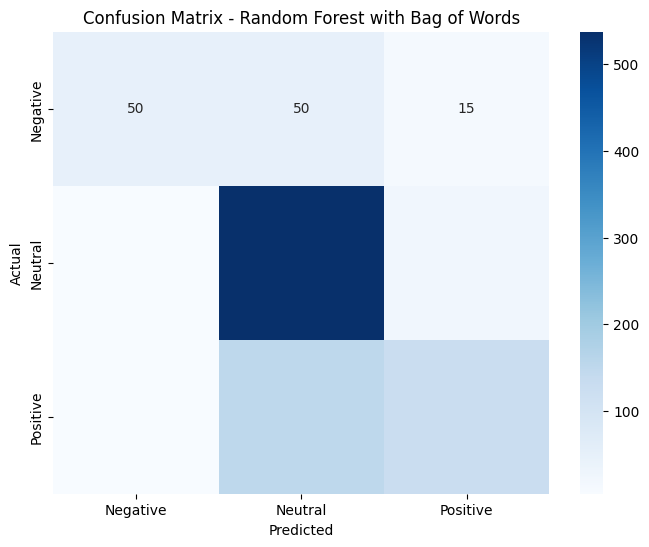

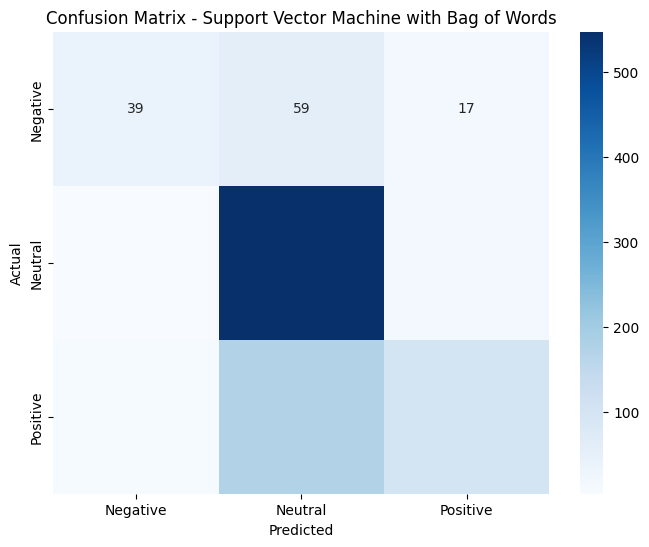

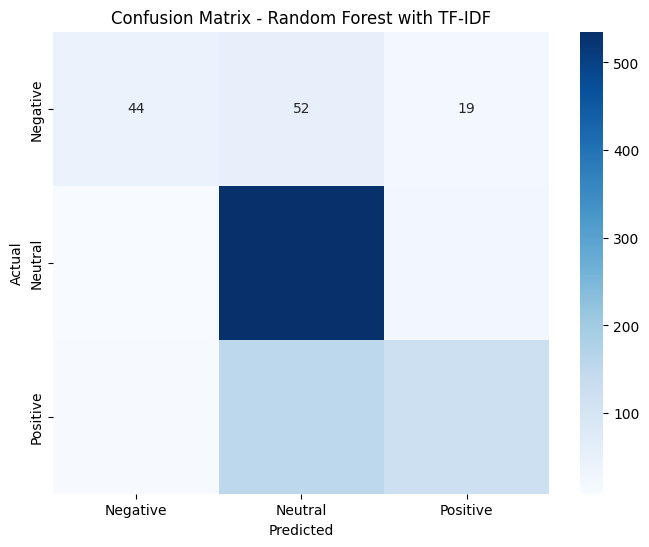

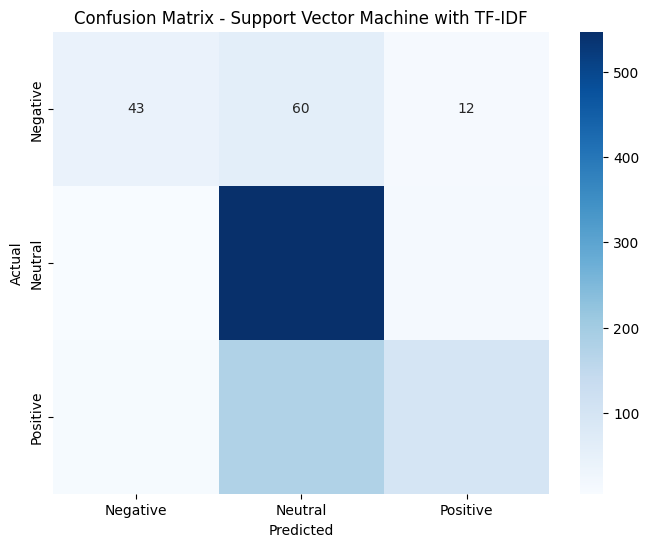

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the feature extractor methods
vectorizers = {
    'Bag of Words': CountVectorizer(),
    'TF-IDF': TfidfVectorizer()
}

# Define the classification algorithms
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42)
}

# Iterate over feature extractor methods and classification algorithms
for vec_name, vectorizer in vectorizers.items():
    X_vec = vectorizer.fit_transform(X_text)
    
    for clf_name, clf in classifiers.items():
        # Split the data into training and testing sets
        X_train_vec, X_test_vec, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)
        
        # Train the classifier
        clf.fit(X_train_vec, y_train)
        
        # Make predictions on the test set
        y_pred = clf.predict(X_test_vec)
        
        # Generate confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        
        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
        plt.title(f'Confusion Matrix - {clf_name} with {vec_name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()